In [ ]:
#hide
# !pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [ ]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
path = Path('cities')

In [ ]:
fns = get_image_files(path)
fns

(#894) [Path('cities/paris/00000047.jpg'),Path('cities/paris/00000055.jpg'),Path('cities/paris/00000107.jpg'),Path('cities/paris/00000030.jpg'),Path('cities/paris/00000097.jpg'),Path('cities/paris/00000148.jpg'),Path('cities/paris/00000110.jpg'),Path('cities/paris/00000112.jpg'),Path('cities/paris/00000091.jpg'),Path('cities/paris/00000093.jpg')...]

In [ ]:
failed = verify_images(fns)
failed

(#0) []

In [ ]:
failed.map(Path.unlink);

In [ ]:
cities = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
dls = cities.dataloaders(path)

### Data Augmentation

## Training Your Model, and Using It to Clean Your Data

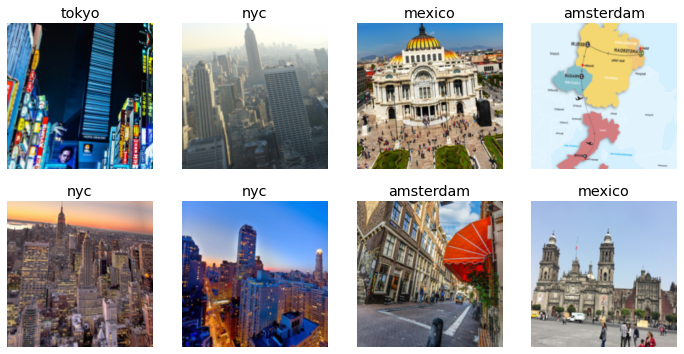

In [ ]:
cities = cities.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = cities.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.591984,1.263235,0.404494,00:15


epoch,train_loss,valid_loss,error_rate,time
0,1.493463,1.130873,0.376404,00:19
1,1.300614,1.070948,0.325843,00:17
2,1.090219,1.050680,0.297753,00:17
3,0.949147,1.044416,0.297753,00:18


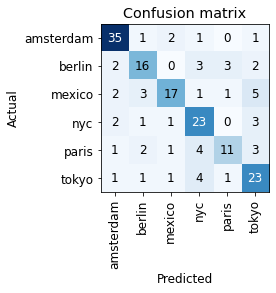

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

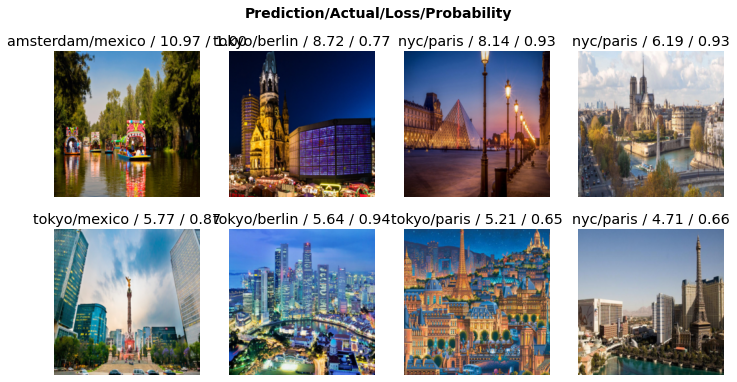

In [ ]:
interp.plot_top_losses(8, nrows=2)

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
learn_inf.dls.vocab

['amsterdam', 'berlin', 'mexico', 'nyc', 'paris', 'tokyo']

In [ ]:
btn_upload = widgets.FileUpload()


In [ ]:
out_pl = widgets.Output()

In [ ]:
lbl_pred = widgets.Label()

In [ ]:
btn_run = widgets.Button(description='Classify')

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
VBox([widgets.Label('Select your city!'), 
      btn_upload, btn_run, out_pl, lbl_pred])